### IMPORT THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from sklearn.impute import SimpleImputer

### READ FILES IN DATAFRAME

In [3]:
trans_df = pd.read_excel(r"KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= "Transactions",header = 1)
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
newCustlist_df = pd.read_excel(r"KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= "NewCustomerList",header = 1)
newCustlist_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [5]:
custdemo_df = pd.read_excel(r"KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= "CustomerDemographic",header = 1)
custdemo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [19]:
custadd_df = pd.read_excel(r"KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= "CustomerAddress",header = 1)
custadd_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### CHECK THE MISSING VALUES

In [7]:
def chk_missing_values():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-7-e0fabb00a34c>, line 2)

In [8]:
trans_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
custdemo_df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

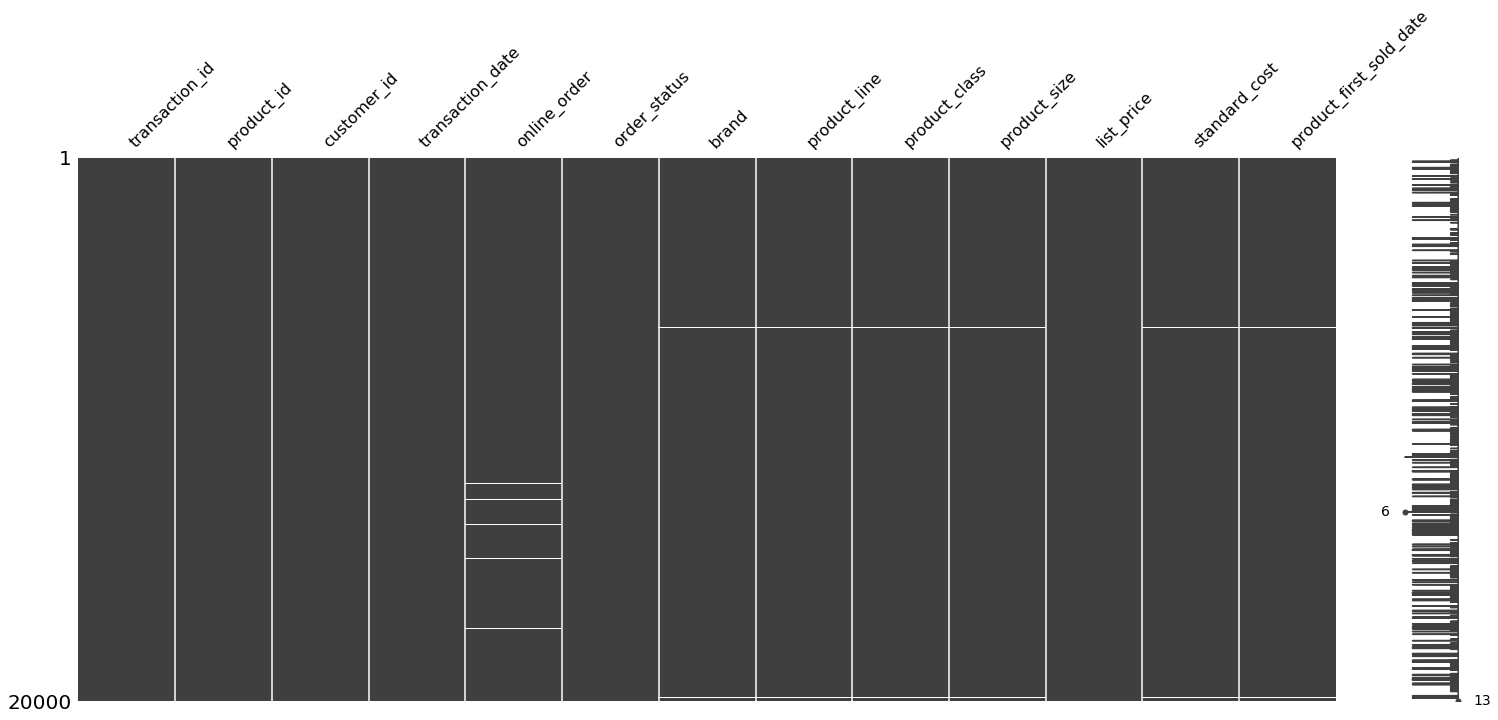

In [10]:
msno.matrix(trans_df)

In [11]:
 #standard cost we can do imputation for the missing values
imputer = SimpleImputer(strategy = 'mean')
trans_df['standard_cost'].values.reshape(-1,1)
trans_df['standard_cost'] = imputer.fit_transform(trans_df['standard_cost'].values.reshape(-1,1))
trans_df['standard_cost']

0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
19995    1203.40
19996     312.74
19997      44.71
19998     136.73
19999    1580.47
Name: standard_cost, Length: 20000, dtype: float64

In [12]:
trans_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost                0
product_first_sold_date    197
dtype: int64

In [13]:
#Null values in the below subset column were dropped.
trans_df=trans_df.dropna(subset=['brand','product_line','product_class','product_size','product_first_sold_date'], 
                        how = 'all', axis = 0)

In [14]:
trans_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [15]:
custdemo_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [16]:
custdemo_df=custdemo_df.dropna(subset=['DOB','tenure'], 
                        how = 'all', axis = 0)

In [17]:
custdemo_df= custdemo_df.drop(columns=['default'], axis = 1) 

In [18]:
trans_df.customer_id.unique()

array([2950, 3120,  402, ..., 2764, 3168, 3464], dtype=int64)

In [19]:
 len(trans_df['customer_id'].unique())

3494

In [20]:
trans_df['customer_id'].nunique()

3494

In [21]:
len(trans_df['customer_id'])

19803

In [22]:
len(custdemo_df['customer_id'])

3913

In [23]:
#n=len(trans_df.online_order)
#for i in n:
#    if(n[i]== 0):
#        print('Ordered online')
#    else:
#        print("not orderedonline")

In [24]:
#Data Analysis Strategies
custdemo_df.dropna(axis = 0, how='any')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0


In [25]:
#Data Cleaning
custdemo_df.info(),custadd_df.info(), trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

(None, None, None)

In [26]:
from datetime import date

In [27]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [28]:
Age = []
for i in custdemo_df['DOB']:
    Age.append(calculate_age(i))

In [29]:
custdemo_df['age'] = Age

In [30]:
custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43


{'whiskers': [<matplotlib.lines.Line2D at 0x238e2246198>,
 'caps': [<matplotlib.lines.Line2D at 0x238e0508fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x238e0508748>],
 'medians': [<matplotlib.lines.Line2D at 0x238e0e83908>],
 'fliers': [<matplotlib.lines.Line2D at 0x238e0e83c50>],
 'means': []}

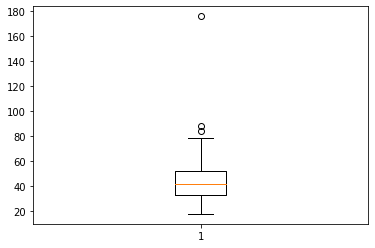

In [31]:
plt.boxplot(custdemo_df.age)

In [32]:
for i in custdemo_df['age']:
    if i>100:
        print (i)
        #custdemo_df.drop(columns = ['age'])

176


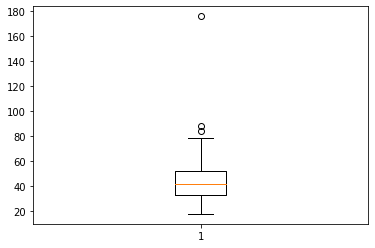

In [33]:
plt.boxplot(custdemo_df.age)
plt.show()

In [34]:
custdemo_df = custdemo_df[custdemo_df['customer_id']!=34]

In [35]:
custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43


In [37]:
custdemo_df['age_by_decade']=pd.cut(custdemo_df['age'], bins = [1, 29, 39, 100 ], labels =['Teens', 'Adults', 'Elderly'])

In [38]:
custdemo_df = custdemo_df.drop(columns = ['age_by_decade'], axis = 1)

In [39]:
custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43


In [40]:
custdemo_df = custdemo_df.rename(columns = {'past_3_years_bike_related_purchases': "bike purchase"})
custdemo_df.head()

,customer_id,first_name,last_name,gender,bike purchase,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43


#### Bike Purchase by age

In [41]:
sns.set(style = "whitegrid")
#df = sns.load_dataset('custdemo_df')
ax = sns.barplot(x = "age_by_decade",y= "bike purchase",data = custdemo_df)

ValueError: Could not interpret input 'age_by_decade'

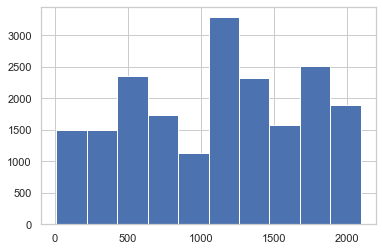

In [42]:
x=trans_df['list_price']
plt.hist(x, bins = 10)
plt.show()

In [43]:
(custdemo_df['bike purchase']/100)*100

0       93.0
1       81.0
2       61.0
3       33.0
4       56.0
        ... 
3994    93.0
3995     8.0
3996    87.0
3998    11.0
3999    76.0
Name: bike purchase, Length: 3912, dtype: float64

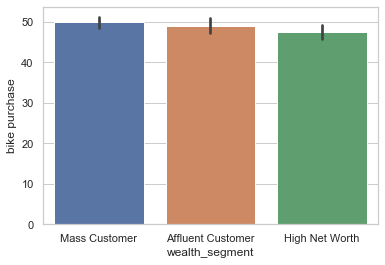

In [44]:
sns.set(style = "whitegrid")
#df = sns.load_dataset('custdemo_df')
ax = sns.barplot(x = "wealth_segment",y= "bike purchase",data = custdemo_df)

In [45]:
custdemo_df.isnull().sum()

customer_id                0
first_name                 0
last_name                121
gender                     0
bike purchase              0
DOB                        0
job_title                497
job_industry_category    656
wealth_segment             0
deceased_indicator         0
owns_car                   0
tenure                     0
age                        0
dtype: int64

In [46]:
custdemo_df.to_excel('custdemo_file.xlsx',encoding='utf-8-sig')

In [47]:
trans_df.to_csv('trans_file.csv',encoding='utf-8-sig')

In [48]:
custadd_df.to_csv('custadd_file.',encoding='utf-8-sig')

In [56]:
newCustlist_df.to_excel('new_cust_list.xlsx',encoding='utf-8-sig')